# Introduction 01 - A2C with CartPole-v1

## Imports

In [1]:
import gym

from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import  evaluate_policy

from PIL import Image
from IPython import display

## Create Env

Here I've used the CartPole-v1 which is a part of the classic control environments from gym.

In [2]:
env = gym.make('CartPole-v1')

## Modeling

### Create Model

In [ ]:
model = A2C('MlpPolicy', env, verbose=1, learning_rate=5e-4)

### Model Evaluation using an untrained model to simulate a random agent and get a benchmark.

In [3]:
mean, std = evaluate_policy(model, env)
print(f'Before training Reward: {mean} +/- {std:.2f}')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/bharat/anaconda3/envs/rl/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Before training Reward: 118.1 +/- 19.35


### Model Training

In [4]:
model.learn(total_timesteps=25000)

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22       |
|    ep_rew_mean        | 22       |
| time/                 |          |
|    fps                | 239      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.00445 |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | 1.98     |
|    value_loss         | 10       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 21.2     |
|    ep_rew_mean        | 21.2     |
| time/                 |          |
|    fps                | 241      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|

### Model Evaluation After Training

In [5]:
mean, std = evaluate_policy(model, env)
print(f'After training Reward: {mean} +/- {std:.2f}')

After training Reward: 500.0 +/- 0.00


## Outputs

### Generate GIF by running the trained agent

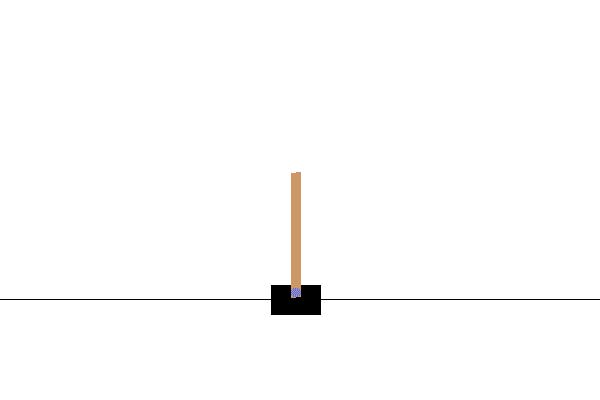

In [6]:
imgs = []

obs = env.reset()
img = env.render('rgb_array')
img = Image.fromarray(img)
imgs.append(img)

while True:
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    img = env.render('rgb_array')
    img = Image.fromarray(img)
    imgs.append(img)

    if done: break

env.close()

imgs[0].save('output.gif', save_all=True, append_images=imgs[1:], optimize=False, loop=0)
display.Image('output.gif')

### Save the Trained Model

In [7]:
model.save('model')